In [1]:
import os
os.chdir('C:/Users/v-kirdwivedi/Documents/GitHub/MatchingAlgorithm/')

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from funcs import *
from multi_funcs import *

In [3]:
for k in np.arange(70, 110, 10):
    for n in np.arange(200, 1100, 100):
        results = gs_f_simulate_nx(100, n, k)
        make_df_cycles(n, k, results, save = True, path = 'data/simulations/small/')
        print('n = ' + str(n) + ', k = ' + str(k) + ' done.')

n = 200, k = 70 done.
n = 300, k = 70 done.
n = 400, k = 70 done.
n = 500, k = 70 done.
n = 600, k = 70 done.
n = 700, k = 70 done.
n = 800, k = 70 done.
n = 900, k = 70 done.
n = 1000, k = 70 done.
n = 200, k = 80 done.
n = 300, k = 80 done.
n = 400, k = 80 done.
n = 500, k = 80 done.
n = 600, k = 80 done.
n = 700, k = 80 done.
n = 800, k = 80 done.
n = 900, k = 80 done.
n = 1000, k = 80 done.
n = 200, k = 90 done.
n = 300, k = 90 done.
n = 400, k = 90 done.
n = 500, k = 90 done.
n = 600, k = 90 done.
n = 700, k = 90 done.
n = 800, k = 90 done.
n = 900, k = 90 done.
n = 1000, k = 90 done.


KeyboardInterrupt: 

In [14]:
results = gs_f_simulate_nx(100, 200, 35)

In [ ]:
gs_simulate_nx()

### Making Pretty Graphs

In [36]:
preferences = mdf_np(1000, 3)
x2 = preferences.copy()

In [37]:
matches, _ = run_gale_shapley(x2, k=3)

In [39]:
matches

,0,1,2,student_id,applications,k,matched,rank1,rank2,rank3,underdemanded
0,101,942,996,0,0,1,False,0.889813,0.615590,0.685207,False
1,78,85,85,1,1,1,False,0.235858,0.952992,0.952992,True
2,935,574,574,2,1,1,False,0.883750,0.906583,0.906583,False
3,337,596,596,3,1,1,False,0.524839,0.504763,0.504763,False
4,351,351,351,4,2,1,False,0.981418,0.981418,0.981418,False
...,...,...,...,...,...,...,...,...,...,...,...
845,597,597,597,995,2,1,False,0.633817,0.633817,0.633817,False
846,204,329,329,996,1,1,False,0.706148,0.965044,0.965044,True
847,530,530,530,997,2,1,False,0.489072,0.489072,0.489072,True
848,287,968,949,998,0,1,False,0.851198,0.845984,0.211102,False


In [40]:
edgelist = to_netword_df(preferences, matches, 3)

In [41]:
edgelist

,new_id_x,new_id_y
0,0,216
1,1,28
2,2,217
3,3,99
4,4,218
...,...,...
238,211,150
239,212,59
240,213,300
241,214,49


In [48]:
G= nx.from_pandas_edgelist(edgelist, source = 'new_id_x', target = 'new_id_y', create_using=nx.DiGraph())

In [49]:
nx.strongly_connected_components(G)

<generator object strongly_connected_components at 0x0000026B25484F20>

In [55]:
for cc in nx.strongly_connected_components(G):
    if len(cc)>1:
        print(cc)

{178, 142}


In [80]:
def get_strongly_connected_components(G):
    scc = []
    n_in_scc = 0
    n_scc = 0
    for cc in nx.strongly_connected_components(G):
        if len(cc)>1:
           scc.append(list(cc))
           n_in_scc += len(cc)
           n_scc += 1
    return scc, n_in_scc, n_scc
            

In [81]:
get_strongly_connected_components(G)

([[178, 142]], 2, 1)

In [56]:
find_cycles(preferences, matches, 3)

(     new_id_x  new_id_y
 0           0       216
 1           1        28
 2           2       217
 3           3        99
 4           4       218
 ..        ...       ...
 238       211       150
 239       212        59
 240       213       300
 241       214        49
 242       215       301
 
 [243 rows x 2 columns],
 1,
 [[178, 142]])

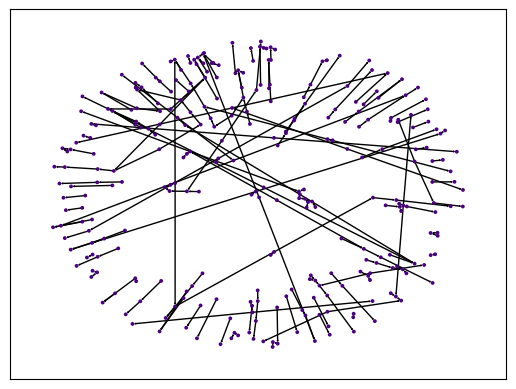

In [53]:
node_sizes = [3 for i in range(len(G))]
M = G.number_of_edges()
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma
pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrows=True,
    arrowstyle="->",
    arrowsize=1,
    edge_color='black',
    edge_cmap=cmap,
    width=1,
)
plt.show()

In [12]:
from random import sample  
  
def create_array(n, k):  
    """  
    Creates an n x k array where the observations are drawn from (1, n) and there is no repetition of values across rows.  
  
    :param n: Number of rows  
    :param k: Number of columns  
    :return: n x k array  
    """  
    if k > n:  
        raise ValueError("k should be less than or equal to n.")  
  
    array = []  
    for row in range(n):  
        array.append(sample(range(1, n + 1), k))
        
    x = pd.DataFrame(array)
    x = x.iloc[:n].reset_index(drop=True)
    x['student_id'] = x.index
    x['applications'] = 0
    #x['N'] = 0
    x['k'] = 0
    x['matched'] = False
    #x[['rank1', 'rank2', 'rank3']] = np.random.uniform(size=(n,3)) We need to change this so that it applies to all k
    for i in np.arange(k):
        var = 'rank' + str(i+1)
        x[var] = np.random.uniform(size=(n,1))
    x['underdemanded'] = True
  
    return x  
  
# Example usage:  
n = 5  
k = 3  
result = create_array(n, k)  
print(result)  

   0  1  2  student_id  applications  k  matched     rank1     rank2  \
0  1  5  2           0             0  0    False  0.754842  0.113883   
1  5  4  3           1             0  0    False  0.545925  0.289659   
2  4  2  1           2             0  0    False  0.653360  0.344513   
3  2  1  5           3             0  0    False  0.728957  0.541547   
4  5  2  4           4             0  0    False  0.602960  0.128197   

      rank3  underdemanded  
0  0.136265           True  
1  0.431712           True  
2  0.440228           True  
3  0.360045           True  
4  0.359562           True  


In [11]:
create_array(10000, 10)

[[3376, 1102, 884, 4230, 4193, 3990, 4686, 13, 3501, 4144],
 [818, 2951, 479, 3651, 2991, 3685, 1066, 2463, 3518, 3619],
 [27, 4292, 1912, 2526, 2529, 3710, 3982, 4394, 350, 4245],
 [1189, 982, 2704, 3296, 3260, 3013, 4728, 4644, 4934, 4503],
 [643, 3609, 2914, 3574, 1160, 4847, 4293, 510, 4228, 1781],
 [738, 3641, 4998, 2213, 3883, 1710, 3015, 4474, 4821, 3827],
 [4990, 4850, 1432, 1113, 2459, 601, 3010, 4748, 4833, 3704],
 [3270, 177, 4368, 3695, 3313, 617, 2269, 3991, 3617, 3159],
 [1249, 4575, 2566, 710, 4928, 125, 1550, 1093, 2564, 4896],
 [1614, 293, 1088, 1610, 4158, 1906, 855, 272, 2479, 4104],
 [343, 1188, 3259, 2214, 4621, 1067, 4359, 2289, 1263, 4075],
 [1873, 1528, 1862, 4133, 2476, 336, 505, 3666, 4574, 3513],
 [3920, 256, 4492, 3582, 1405, 2904, 264, 1718, 4623, 4117],
 [344, 3067, 1881, 4239, 2802, 1154, 3404, 4356, 2966, 2018],
 [994, 1677, 3305, 710, 1978, 3005, 684, 1177, 326, 3561],
 [1769, 3741, 208, 4923, 3445, 35, 781, 2472, 1648, 1489],
 [852, 441, 3596, 3425, 10

In [8]:
files = os.listdir('data/simulations/small/')

In [9]:
df = pd.DataFrame()
for s in files:
    df2 = pd.read_csv('data/simulations/small/' + s)
    df = pd.concat([df, df2])

In [16]:
df['k'] = df['k'].astype('category')

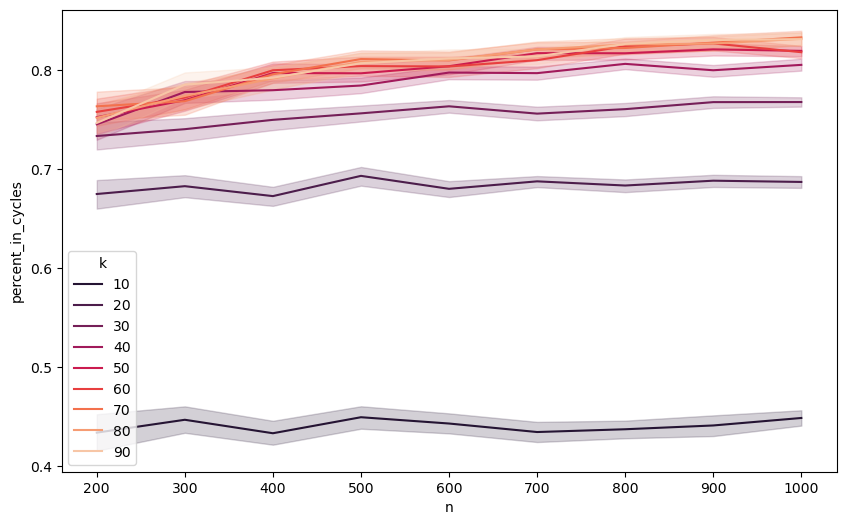

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='n', y='percent_in_cycles', hue='k', data=df, ax=ax, palette='rocket', hue_order = [10,20,30,40,50,60,70,80,90])
plt.show()